[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

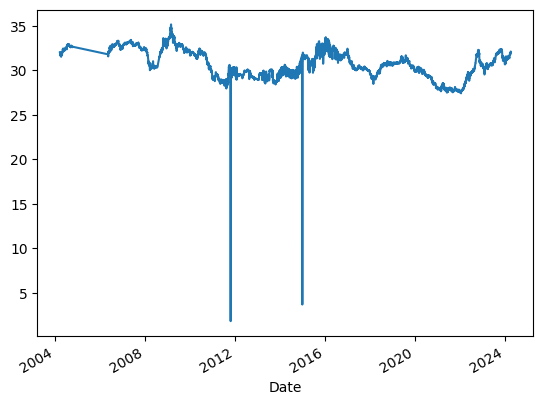

In [1]:

"""
取得外匯商品資料
"""

# 載入函數工具檔
import requests
import pandas as pd
from bs4 import BeautifulSoup
# 以下為自訂函數「getDataYF」使用
import os
import yfinance as yf

def getDataYF(prod):
    # 備份文件的資料夾
    folder_name = "data"
    # 檢查資料夾是否存在
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # 1. 定義備份檔案名稱
    bakfile = os.path.join(folder_name, f"yf_{prod}.csv")
    # 2. 檢視是否有歷史資料(本地端)
    if os.path.exists(bakfile):
        yfdata = pd.read_csv(bakfile)
        yfdata["Date"] = pd.to_datetime(yfdata["Date"], format="%Y-%m-%d")
        yfdata.set_index("Date", inplace=True)
    else:
        # 最大範圍
        yfdata = yf.download(prod, period="max")
        # 也可以指定起迄日期
        # yfdata = yf.download(str(prod), start='2020-01-01', end='2024-03-31')
        yfdata.columns = [i.lower() for i in yfdata.columns]
        # 上網下載後 存到本地端
        yfdata.to_csv(bakfile)
    return yfdata

# 取得外匯商品標的
url = "https://tw.stock.yahoo.com/currencies"
html = requests.get(url)
soup = BeautifulSoup(html.text)
ul = soup.find("ul", class_="M(0) P(0) List(n)")
rs = []
for li in ul.find_all("li"):
    tmplist = [i.text for i in li.find_all("span")]
    rs.append(tmplist)
currencies_info = pd.DataFrame(rs)

# 取得外匯資料
prod = currencies_info.iloc[0, 2]
data = getDataYF(prod)

# 繪製外匯走勢圖
data["close"].plot()
